In [25]:
from PIL import Image as pilImage
from os import listdir
from IPython import display
import pandas as pd
from IPython.display import Image as ipImage
import ipywidgets as widgets
import random

In [12]:
def display_images(files, width, height, padding, save_path):
    new_image = pilImage.new('RGB', 
                             (width * len(files) + (padding * (len(files) - 1)), height), 
                             color = (255, 255, 255))

    for i, pic in enumerate(files):
        image = pilImage.open(pic)
        image.thumbnail((width, height))
        new_image.paste(image, ((width * i) + (padding * i), int((height - image.height) / 2)))

    new_image.save(save_path)
    display.display(ipImage(save_path))
    
    
def switch_image_linegraph(name):
    display.display(ipImage('results/linegraph_' + name + '.png'))
    
    
def switch_image_heatmap(epoch):
    display.display(ipImage('results/heatmap_epoch_' + str(epoch) + '.png'))

# Sheeto Food Recognition AI
<hr>

## Step 1 - Converting Photos into AI Data

<p>The AI begins by taking a set of images organized into food categories. Quality and size do not matter at this stage, all the AI needs is for the files to be organized correctly.</p></br>
<p>Below are a few examples of the initial images in the AI's training set</p>

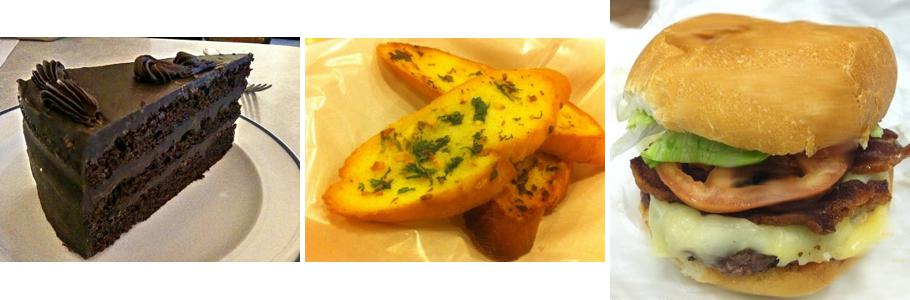

In [13]:
example_files = ['images/examples/hd/' + file_name for file_name in listdir('images/examples/hd')]

display_images(example_files, 300, 300, 5, 'images/examples/hd_combined.jpg')

<p>To process the images through the neural network, the images are then downsized to allow the AI to work much faster by avoiding unnecessary details. The images are also cropped to be the same universal size as the AI only accepts one input shape (height, width, and color). The AI's version of the three images above are displayed next.</p>

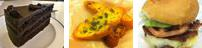

In [14]:
example_files = ['images/examples/ld/' + file_name for file_name in listdir('images/examples/ld')]

display_images(example_files, 64, 48, 5, 'images/examples/ld_combined.jpg')

<p>This adjustment is repeated for all images in the directory provided to create a training dataset. Some randomly-selected examples are displayed below.</p>

<h3>garlic_bread</h3>

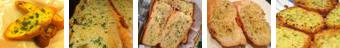

<h3>chocolate_cake</h3>

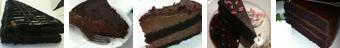

<h3>fried_rice</h3>

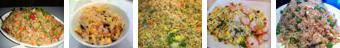

<h3>ceasar_salad</h3>

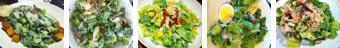

<h3>macarons</h3>

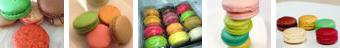

In [15]:
eval_folders = ['images/eval_data/' + file_name for file_name in listdir('images/eval_data')]
random_folders = [eval_folders[i] + '/' for i in random.sample(range(len(eval_folders)), 5)]

for i in range(len(random_folders)):
    md = display.Markdown('<h3>{}</h3>'.format(random_folders[i].split('/')[-2]))
    display.display(md)
    example_files = [random_folders[i] + file_name for file_name in listdir(random_folders[i])]
    random_files = [example_files[i] for i in random.sample(range(len(example_files)), 5)]
    display_images(random_files, 64, 48, 5, 'images/eval_combined_{}.jpg'.format(i))

<hr>

## Step 2 - AI Learning and Results
### Evaluation and Accuracy

<p>Overtime, the AI does its best to find patterns between images of the same food category by repeatedly scanning through every image in its training set. Each time this full scan is done, it's evaluated against an "evaluation set", a hand-picked collection of images that best represent their food categories. The intention is to provide the AI with the simplest test possible to see, for example, if it really understands what a hamburger looks like.</p>

<p>Some randomly-selected examples are pictured here.</p>

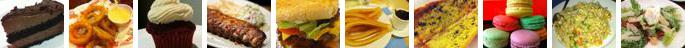

In [16]:
random_folders = [eval_folders[i] + '/' for i in random.sample(range(len(eval_folders)), 10)]
random_files = []

for folder in random_folders:
    example_files = [folder + file_name for file_name in listdir(folder)]
    random_files.append(example_files[random.randrange(len(example_files))])

display_images(random_files, 64, 48, 5, 'images/eval_examples.jpg')

<p>This scanning-and-evaluating loop is run 60 times as further iterations consistently failed to improve the AI's performance.</p>

<p>Each time the AI is evaluated, its accuracy is determined by simply checking how many images in the evaluation set it predicted correctly. This is pictured next.</p>

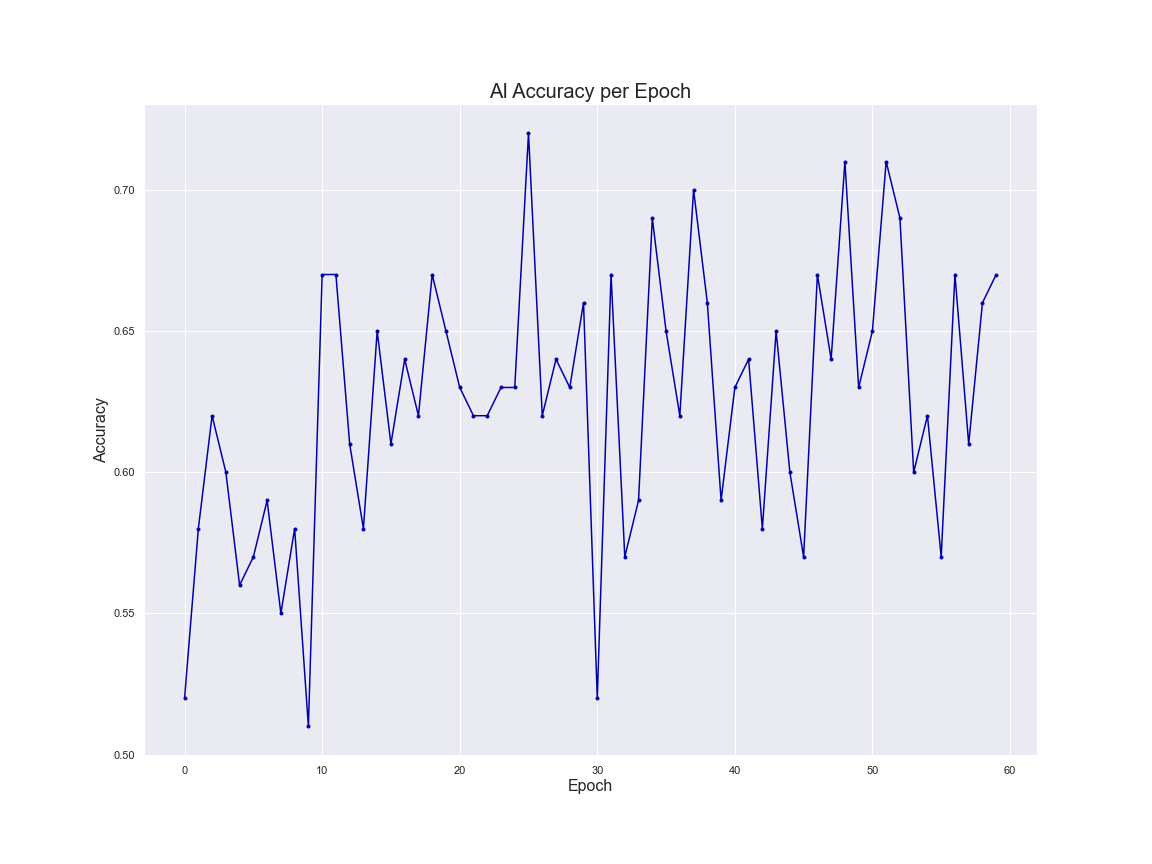

In [17]:
display.display(ipImage('results/linegraph_overall.png'))

<p>This accuracy data can be further broken down by determining how the AI performed in individual categories, making it clear which types of food it struggles or faces no issues with. Pictured below is an interactable graph of individual food groups over the course of the training process.</p>

In [18]:
category_dd = widgets.Dropdown(
    options = [path.split('/')[-1] for path in eval_folders],
    value = eval_folders[0].split('/')[-1],
    description = 'Category:',
    disabled = False
)

widgets.interact(switch_image_linegraph, name = category_dd)

interactive(children=(Dropdown(description='Category:', options=('baby_back_ribs', 'ceasar_salad', 'chocolate_…

<function __main__.switch_image_linegraph(name)>

### Confidence

<p>The AI's development can also be visualized by graphing how "confident" it is about each image it predicts the category of. Below is an interactive heatmap (generated every five iterations) representing how sure the AI is of each answer, regardless of whether or not it's correct (0 is 0% confidence, 1.0 is 100% confidence). Each row represents one image, and each category of image is shown one after the other from top to bottom.</p>

<p>In the ideal case where the AI has 100% accuracy, this heatmap would appear as a downward staircase of equally-sized blocks, indicating that every answer was not only correct, but the AI was confident in its predictions. The slider here can be used to see the AI approach this perfect staircase as it learns.</p>

In [21]:
epoch_slider = widgets.IntSlider(
    value = 0, min = 0, max = 55,
    step = 5,
    description = 'Epoch: ',
    )

widgets.interact(switch_image_heatmap, epoch = epoch_slider)

interactive(children=(IntSlider(value=0, description='Epoch: ', max=55, step=5), Output()), _dom_classes=('wid…

<function __main__.switch_image_heatmap(epoch)>

<hr>

# Step 3 - AI Predictions

<p>Once the AI is done training, its ability to identify images can be put to the test. Toggle the dropdown below to view the images in the evaluation set that the AI believes are in the selected category.</p>

In [20]:
eval_data = []
for folder in eval_folders:
    eval_data += [folder + '/' + file_name for file_name in listdir(folder)]
    
prediction_data = pd.read_csv('results/prediction_data.csv')['predicted_label']
eval_labels = [path.split('/')[-1] for path in eval_folders]
    
    
def display_category(category):
    if category != 'Select category':
        cat_pics = []
        for i, p in enumerate(prediction_data):
            if p == eval_labels.index(category):
                cat_pics.append(eval_data[i])

        display_images(cat_pics, 64, 48, 5, 'images/search_results.jpg')
    
    
category_dd = widgets.Dropdown(
    options = ['Select category'] + [path.split('/')[-1] for path in eval_folders],
    value = 'Select category',
    description = 'Category:',
    disabled = False
)

widgets.interact(display_category, category = category_dd)

interactive(children=(Dropdown(description='Category:', options=('Select category', 'baby_back_ribs', 'ceasar_…

<function __main__.display_category(category)>

In [22]:
#%load_ext watermark

%watermark -v -m -p PIL,pandas,IPython,ipywidgets

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.20.0

PIL       : 8.1.0
pandas    : 1.2.1
IPython   : 7.20.0
ipywidgets: 7.6.3

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit

